<h1 style='text-align:center; color: #00bfff;'>Investigate a Dataset</h1>
<h3 style='text-align:center; color: #00bfff;'>Udacity Data Analysis Project 1</h3>

### Introduction


For this project, we will conduct data analysis and create a file to share that documents our findings. We start by taking a look at the dataset and brainstorming what questions we could answer using it. Then we use Pandas and NumPy to answer the questions we are most interested in, and create a report sharing the answers. 

In [62]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [63]:
data = pd.read_csv('titanic-data.csv')

In [64]:
data.shape

(891, 12)

The dataset contains 12 variables and 891 records. Now let's take a look at some of the records.

In [65]:

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<strong>Handling missing value:</strong> the data has missing values "NaN". Sometimes, it's important that we clean the missing data before we can actually analyze it. In addition, we choose to ignore "Cabin" and other variables and focus more on "Pclass", "Sex", "Fare" and "Age" variables on which we will conduct our analysis.

In [66]:
chosen_data = data.loc[:,['Survived', 'Pclass', 'Fare', 'Sex', 'Age']]
clean_data = chosen_data.dropna()

In [67]:
clean_data.shape

(714, 5)

In [68]:
clean_data.corr()

,Survived,Pclass,Fare,Age
Survived,1.000000,-0.359653,0.268189,-0.077221
Pclass,-0.359653,1.000000,-0.554182,-0.369226
Fare,0.268189,-0.554182,1.000000,0.096067
Age,-0.077221,-0.369226,0.096067,1.000000


After omitting the missing data, we have a dataset of 714 records. We'll look at the statistics of our numerical data to get some insights. We especially look at the correlation between each variable we've chosen above.


Class 3 had the most passengers (49.7% of the population) whereas Class 1 and Class 2 share the rest of the population.<br>
<strong>Our first question is:</strong> Does Pclass have anything to do with the survival rate?<br>
Our correlation coefficient between Pclass and Fare is -0.55 which indicates that the lower the Pclass, the higer the Fare passengers pay. Let's take a look at the chart below to get a better understanding of this relation

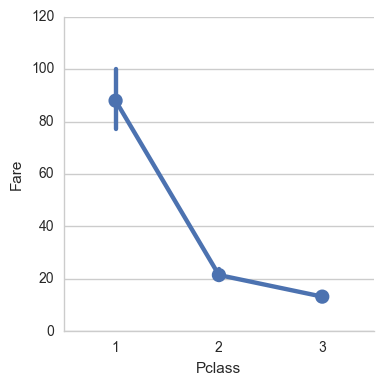

In [91]:
sns.factorplot(data=clean_data, x='Pclass', y='Fare')
plt.show()

The fare passengers pay is higher for Class 1 which indicates that Class 1 has more rich passengers than other classes. We may ask whether or not those in Class 1 have the highest survival rate because the rich people often have advantage over the poor people, they were probably put on lifeboats first. To discover this, we will subset our data in to 3 groups corresponding with their Pclass; then we calculate the survival rate of each group.

In [92]:
group1 = clean_data[clean_data['Pclass']==1]
group2 = clean_data[clean_data['Pclass']==2]
group3 = clean_data[clean_data['Pclass']==3]
group1['Survived'].mean(), group2['Survived'].mean(), group3['Survived'].mean()


(0.6559139784946236, 0.4797687861271676, 0.23943661971830985)

The results above actually bolster our speculation. It's clear that the lower Pclass is, the higher the survival rate becomes. We conclude that social class and money may have an impact on passengers' survival rate.


However, we shouldn't think that money and social class are the only two factors that impact survival rate. Our human society also is divided into many different divisions, among which are Age and Sex. So <strong>the second question we'd pose is:</strong> "Do Age and Sex actually decide passenger's survival?". To answer this question, we'll calculate the correlation between Survived and Sex/Age variable. First, let's visualize its relationship.

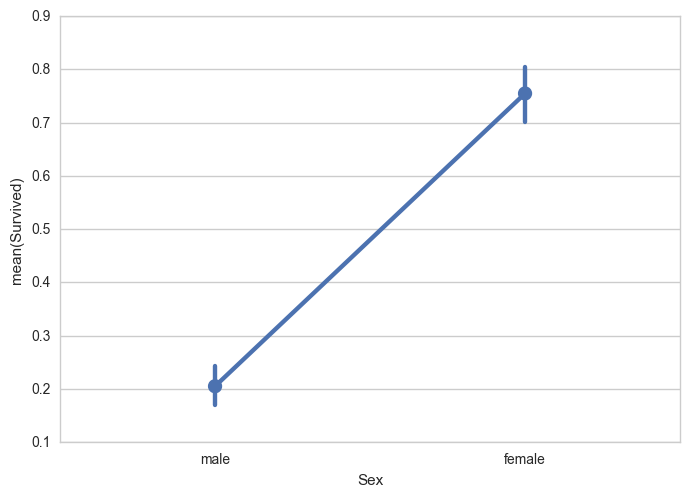

In [93]:
sns.pointplot(x='Sex', y='Survived', data=clean_data);
plt.show()


Female passengers have significantly high chance to survive than male passengers, and this can be partly explained by our culture that gives women high priority, but we aren't sure. Some may say that class 1 contains almost female passengers and this may contribute to the result above, so we need to calculate the proportion of male/female in each class to verify the validity of this argument.

In [73]:
print('The proportion of male/female in class 1:')
group1.groupby('Sex').size() * 100 / group1.shape[0]

The proportion of male/female in class 1:


Sex
female    45.698925
male      54.301075
dtype: float64

In [74]:
print('The proportion of male/female in class 2:')
group2.groupby('Sex').size() * 100 / group2.shape[0]

The proportion of male/female in class 2:


Sex
female    42.774566
male      57.225434
dtype: float64

In [75]:
print('The proportion of male/female in class 3:')
group3.groupby('Sex').size() * 100 / group3.shape[0]

The proportion of male/female in class 3:


Sex
female    28.732394
male      71.267606
dtype: float64

We see that the proportion of male passengers is always greater than that of female passengers; therefore the argument above is not valid. We conclude that female passengers are more likely to be saved than their counterparts. <br>
Furthermore, we'd like to see what impact Age has on passengers' survival rate. We'll visualize the distribution of Age of the survived group and the died group.

In [76]:
survived=clean_data[clean_data['Survived']==1]
dead=clean_data[clean_data['Survived']==0]
                    

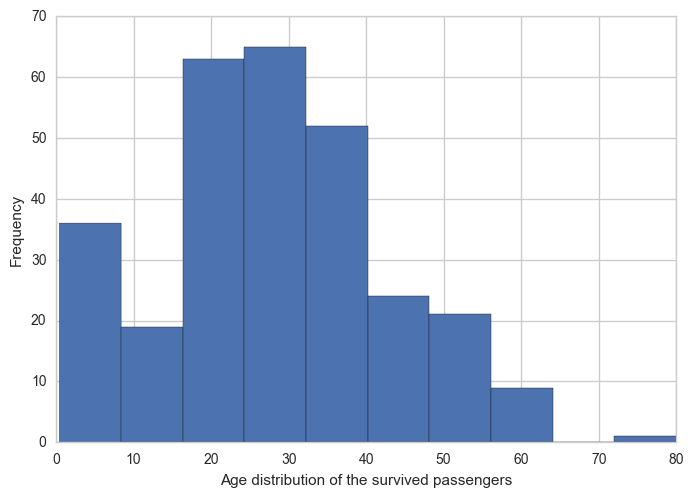

In [77]:
def makehist(column_data, xlabel):
    plt.hist(column_data)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()
makehist(survived['Age'],'Age distribution of the survived passengers')

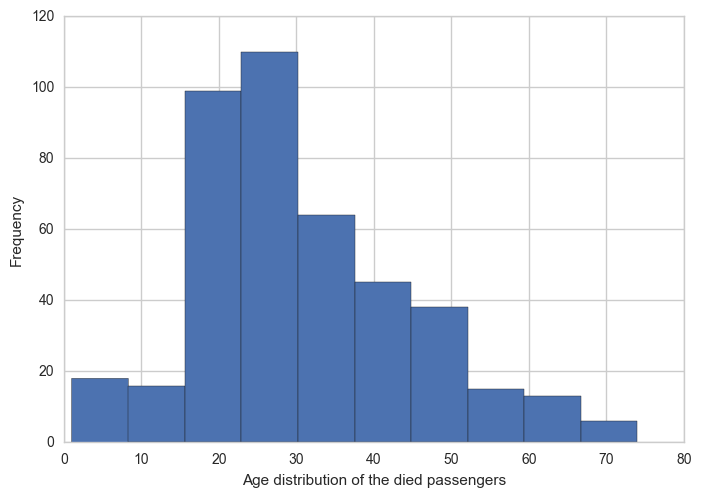

In [78]:
makehist(dead['Age'],'Age distribution of the died passengers')

We see that children whose age is less than 15 are more likely to be saved. We want to take a closer look by calculating the correlation coefficient of Age and Survived.

In [79]:
age_sur = clean_data.loc[:,['Survived', 'Age']]
age_sur.corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


The correlation coefficient of "Age" is -0.07 which means it's inversely propotional to "Survived". Let's use 1 tailed 2 sample t test to verify the speculation that those who are survived are likely to be younger. We want to test the hypothesis at the a = 0.05 level (95%) <br>

H0: the average age of the survived population is less than that of the dead population.
<br>
HA: the average age of the survived population is equal or higher that of the dead population.
<br>
In other words:
<br>
H0: µ1 = µ2 
<br>
HA: µ1 ≠ µ2


In [80]:
survived["Age"].describe()


count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [81]:
dead["Age"].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [82]:
t_stat=(28.34-30.63)/((14.95**2)/290+(14.17**2)/424)**0.5
t_stat

-2.052959754007439

Degree of freedom is 712, so our t critical value is -1.646

Our t statistic is less than t critical value, so we reject the null hypothesis. It's likely that the average age of those who survived is lower than that of the died passengers. However, we don't know whether being young actually increases passengers' survivability.

There are many other interesting questions we can think of for examples: if the passengers are in cabins that are close to the deck, they will have a higher chance to survive...etc. With that said, we recognized the limitation of our data: the presence of missing values, human mistakes when they record the data, the lack of passengers' information other than what we already have, for examples: passengers' physical health, mental health, having children or not...etc   

<hr>
<p style="text-align:center; text-decoration: none !important ">Contact <a href="https://www.linkedin.com/in/thong-tran-0b023299">Buu Thong Tran</a><p>